In [76]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date, time
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns


In [136]:
data_path = os.getcwd() + '/Data/'
date = datetime.now().strftime("%Y%m%d")

elem = pd.read_csv(f'{data_path}raw/elemeta.csv')[['channel','clean_target','Metal.Tag']]
elem.set_index('channel')


,clean_target,Metal.Tag
channel,,
1,Histone H3,In113
2,SMA,In115
3,pan Cytokeratin,Pr141
4,CD38,Nd142
5,HLA-DR,Nd143
6,ICOS,Nd144
7,CD27,Nd145
8,CD68,Nd146
9,CD163,Sm147


In [151]:
elem.iloc[0][1]

'Histone H3'

In [161]:
expr = pd.read_csv(f'{data_path}raw/expr.csv').T
for i in range(1,42):
    marker = elem.iloc[i-1][1]
    expr = expr.rename(columns={expr.columns[i-1]: f'{marker}_c{i}'})

expr.index.name = 'CellID'
expr.head()

,Histone H3_c1,SMA_c2,pan Cytokeratin_c3,CD38_c4,HLA-DR_c5,ICOS_c6,CD27_c7,CD68_c8,CD163_c9,Siglec-1 / CD169_c10,...,CD4_c32,CD31 / vWF_c33,CD14_c34,CCL21_c35,CD206 (MMR)_c36,Cleaved Caspase3_c37,Iridium_c38,Iridium2_c39,CD15_c40,HLA-ABC_c41
CellID,,,,,,,,,,,,,,,,,,,,,
B15-69198-1_1_1,1.242234,0.794642,0.394453,0.055527,0.379699,0.055527,0.055527,0.963099,0.110884,0.591825,...,0.459815,0.870105,0.740088,0.087191,0.150228,0.488299,3.338554,3.880843,0.095095,0.087191
B15-69198-1_1_2,1.089052,1.488847,0.047601,0.258999,1.810890,0.118768,0.189343,2.280824,0.952481,1.004747,...,0.941778,1.163546,1.967899,0.387086,0.181541,2.047449,2.712465,3.258354,0.150228,0.251314
B15-69198-1_1_3,0.286955,0.153937,0.381581,0.009091,0.180831,0.000000,0.018181,0.321695,0.018181,0.045439,...,0.171880,0.135945,0.153937,0.018181,0.009091,0.153937,3.033770,3.589821,0.153937,0.045439
B15-69198-1_1_4,0.044761,0.336876,0.074558,0.044761,0.294243,0.044761,0.059666,0.364977,0.089433,0.364977,...,0.406613,1.207118,0.748902,0.044761,0.029846,0.392805,2.513626,3.123710,0.392805,0.178160
B15-69198-1_1_5,2.414764,1.524671,0.938664,0.112544,0.832706,0.090104,0.127474,0.544171,0.179486,0.589347,...,0.595714,1.443635,1.241789,0.194265,0.216353,0.633467,2.770861,3.315642,0.289186,0.209001


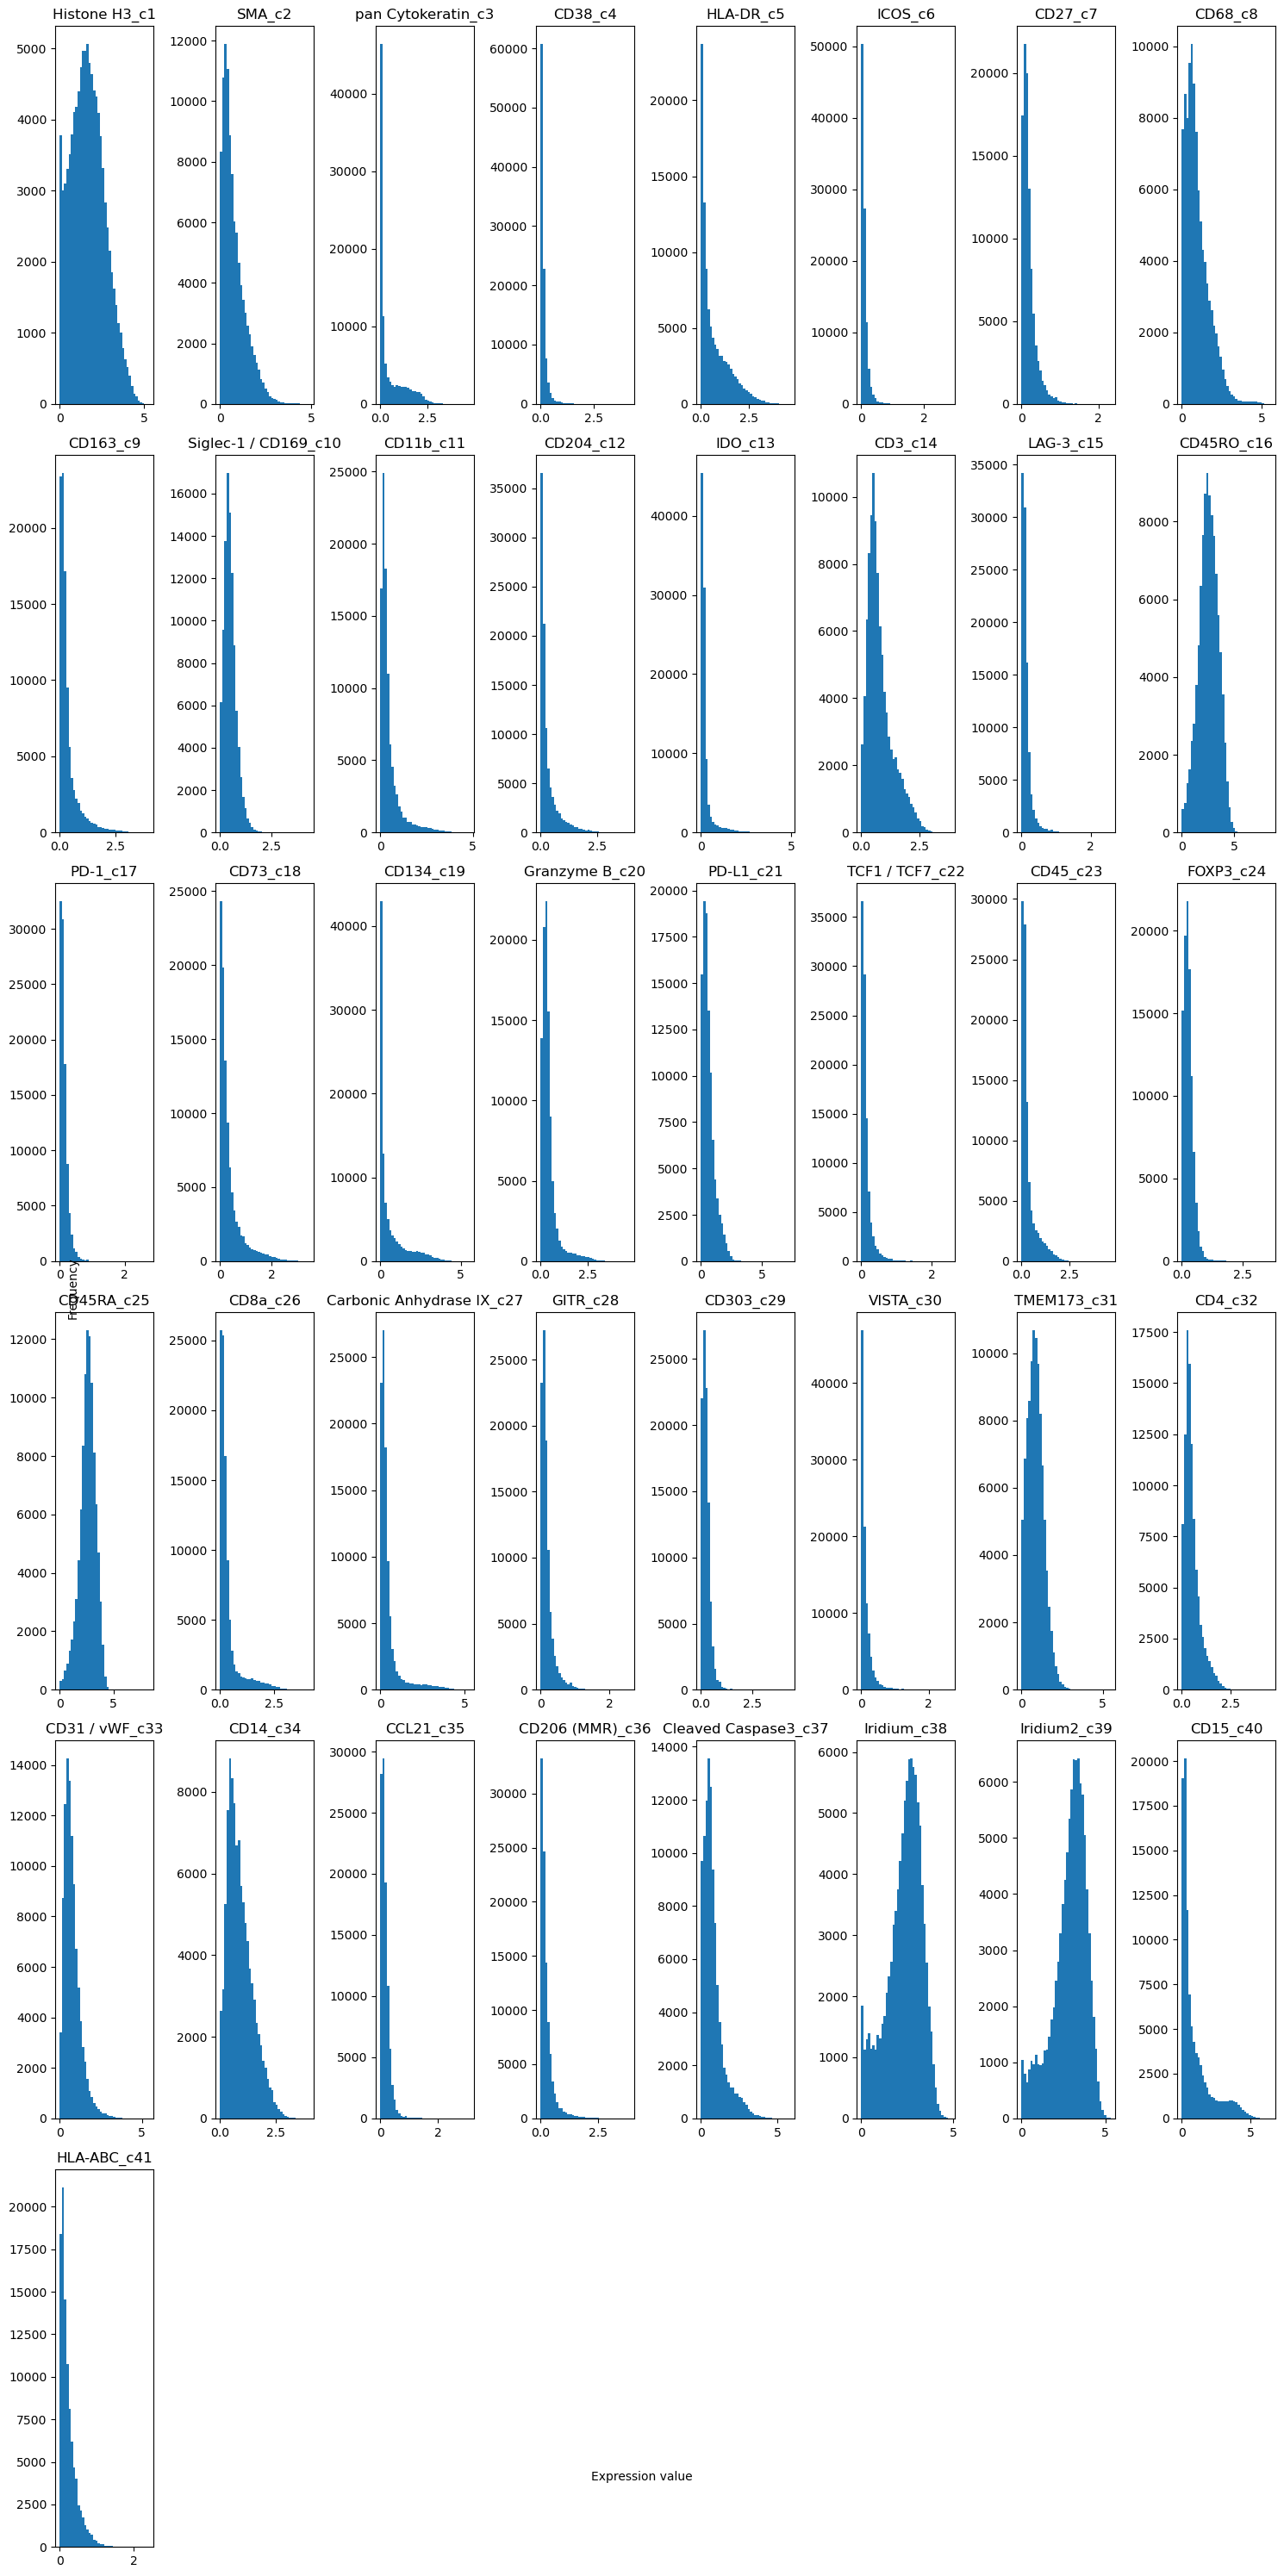

In [181]:
# Calculate number of rows and columns for subplots
num_columns = 8
num_plots = len(expr.columns)
num_rows = -(-num_plots // num_columns)  # Ceiling division to calculate number of rows

# Create subplots
fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, 5*num_rows))

# Flatten axs if it's 2D
if num_rows > 1:
    axs = axs.flatten()

# Iterate over each column and plot histogram
for i, col in enumerate(expr.columns):
    ax = axs[i]
    ax.hist(expr[col], bins=40)
    ax.set_title(col)

# Remove empty subplots
for j in range(i+1, num_rows*num_columns):
    fig.delaxes(axs[j])

# Set common labels
fig.text(0.5, 0.04, 'Expression value', ha='center', va='center')
fig.text(0.06, 0.5, 'Frequency', ha='center', va='center', rotation='vertical')

plt.tight_layout()
plt.show()

In [88]:
coldata = pd.read_csv(f'{data_path}/raw/coldata.csv')
coldata.iloc[:,5:]

,MajorAxisLength,MinorAxisLength,PatientID,ImmuneStatus,TherapyStatus,Block,BatchID,SampleID,ROI,Cluster_15.sub,Cluster_20.sub,Cluster_25.sub,Cluster_30.sub,Cluster_35.sub,Cluster_40.sub,Cluster_45.sub,Cluster_levels
0,19.329256,9.852044,2,Tcell_low,pre,B15-69198-1,20200318,B15-69198-1,1,3,5,4,5,16,19,4,Undefined
1,13.614734,12.433632,2,Tcell_low,pre,B15-69198-1,20200318,B15-69198-1,1,15,17,19,10,9,4,11,Myeloid
2,13.970268,10.551222,2,Tcell_low,pre,B15-69198-1,20200318,B15-69198-1,1,3,25,4,5,1,19,14,Undefined
3,11.342861,8.012685,2,Tcell_low,pre,B15-69198-1,20200318,B15-69198-1,1,3,5,4,5,16,19,4,Undefined
4,15.599016,11.189210,2,Tcell_low,pre,B15-69198-1,20200318,B15-69198-1,1,2,8,11,11,3,8,17,T cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99654,10.351080,8.891096,5,Tcell_low,post,B19-15832-1,20200319,B19-15832-1,2,3,9,24,20,8,1,7,Undefined
99655,14.468264,14.097899,5,Tcell_low,post,B19-15832-1,20200319,B19-15832-1,2,3,5,4,5,16,19,4,Undefined
99656,14.723733,13.518356,5,Tcell_low,post,B19-15832-1,20200319,B19-15832-1,2,3,25,4,5,1,19,14,Undefined
99657,13.197322,10.039168,5,Tcell_low,post,B19-15832-1,20200319,B19-15832-1,2,3,25,24,20,16,1,7,Undefined


In [195]:
coldata['Cluster_levels'].unique()

array(['Undefined', 'Myeloid', 'T cell', 'Vessel', 'Tumour', 'Stroma'],
      dtype=object)

In [188]:
# Concatenate values of selected columns into a new column
coldata['CellID'] = coldata['SampleID'].astype(str) + '_' + coldata['ROI'].astype(str) + '_' + coldata['CellNumber'].astype(str)
coldata['ROI_ID'] = coldata['SampleID'].astype(str) + '_' + coldata['ROI'].astype(str)

# Count unique combinations and  make sure it is unique
unique_combinations = coldata['ROI_ID'].nunique()
if unique_combinations == len(coldata):
    print('Length matches')

# Print the number of unique combinations
cd = coldata[['Cluster_levels', 'Center_X', 'Center_Y', 'SampleID', 'BatchID', 'ROI_ID' ,'CellNumber', 'CellID']].set_index(['CellID'])

# add expression data
cd = pd.merge(cd, expr, left_index=True, right_index=True)

batch1 = cd[cd['BatchID']== 20200318]
batch2 = cd[cd['BatchID']== 20200319]

cd.to_csv(f'{data_path}celldata/celldata_expr_{date}.csv')

batch1.to_csv(f'{data_path}celldata/celldata_b1_expr_{date}.csv')
batch2.to_csv(f'{data_path}celldata/celldata_b2_expr_{date}.csv')

batch2

,Cluster_levels,Center_X,Center_Y,SampleID,BatchID,ROI_ID,CellNumber,Histone H3_c1,SMA_c2,pan Cytokeratin_c3,...,CD4_c32,CD31 / vWF_c33,CD14_c34,CCL21_c35,CD206 (MMR)_c36,Cleaved Caspase3_c37,Iridium_c38,Iridium2_c39,CD15_c40,HLA-ABC_c41
CellID,,,,,,,,,,,,,,,,,,,,,
B16-67351-1_1_1,T cell,517.244898,7.057143,B16-67351-1,20200319,B16-67351-1_1,1,2.784038,0.898585,3.019521,...,0.493953,0.745366,0.898585,0.540624,0.579296,1.682277,0.596622,1.057119,0.293718,0.093740
B16-67351-1_1_2,Undefined,530.480769,3.576923,B16-67351-1,20200319,B16-67351-1_1,2,0.115130,0.247466,3.477450,...,0.614446,0.598280,0.768304,0.393604,1.106281,1.542320,0.581972,0.894907,0.247466,0.038452
B16-67351-1_1_3,Undefined,495.138340,24.454545,B16-67351-1,20200319,B16-67351-1_1,3,3.113996,1.198047,3.420802,...,0.596418,0.731433,1.631706,0.348626,0.458115,1.512185,0.847434,1.302623,0.396633,0.071086
B16-67351-1_1_4,T cell,506.568182,17.454545,B16-67351-1,20200319,B16-67351-1_1,4,3.334287,1.342688,3.369264,...,1.033316,0.832331,1.531540,0.511494,0.491353,1.716681,0.781593,1.353747,0.236428,0.068129
B16-67351-1_1_5,Vessel,631.648352,15.950549,B16-67351-1,20200319,B16-67351-1_1,5,2.734019,1.141808,0.038452,...,0.234119,3.076551,0.956983,0.416431,0.060403,0.456506,1.395949,1.898704,0.218048,0.098741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B19-15832-1_2_695,Undefined,85.154930,874.042254,B19-15832-1,20200319,B19-15832-1_2,695,0.168220,1.562953,0.014084,...,0.126424,0.182091,0.056308,0.000000,0.000000,0.056308,0.500028,0.621235,0.140384,0.056308
B19-15832-1_2_696,Undefined,173.955696,877.145570,B19-15832-1,20200319,B19-15832-1_2,696,0.406439,1.005396,0.006329,...,0.225921,0.406439,0.876891,0.082186,0.329451,0.817311,0.305359,0.685535,0.119965,0.018986
B19-15832-1_2_697,Undefined,412.258065,878.238710,B19-15832-1,20200319,B19-15832-1_2,697,0.425732,0.135073,0.019354,...,0.012903,0.109459,0.217633,0.045146,0.000000,0.045146,0.317233,0.489851,0.058032,0.032252


In [197]:
cd['Cluster_levels'].unique()

array(['Undefined', 'Myeloid', 'T cell', 'Vessel', 'Tumour', 'Stroma'],
      dtype=object)

In [209]:
def plot_markers_per_cell(data, celltypes, channels, size, colors, max_xy=None, savefig=False):
    for idx, ct in enumerate(celltypes):
        df_temp = data[data['Cluster_levels'] == ct]
        if len(channels) == 3:
            plt.scatter((df_temp[f'Intensity_MeanIntensityCorrectedLS_FullStackFiltered_{channels[0]}']), (df_temp[f'Intensity_MeanIntensityCorrectedLS_FullStackFiltered_{channels[1]}']), s=0.1, alpha=1, cmap='hot', c = (df_temp[f'Intensity_MeanIntensityCorrectedLS_FullStackFiltered_{channels[2]}']))
            plt.colorbar(orientation='vertical')
        else:
            plt.scatter((df_temp[channels[0]]), (df_temp[channels[1]]),color=colors[idx],label=ct, s=size, alpha=1)
    if max_xy:
        plt.axis([0, max_xy[0], 0, max_xy[1]])

    markx = channels[0]
    marky = channels[1]
    # markz = markerchannel.loc[markerchannel['channel'] == channels[2], 'Clean_Target'].values[0]

    plt.xlabel(f'{markx} intensity')
    plt.ylabel(f'{marky} intensity')
    # plt.title(f'Marker intensities of {celltypes} in {cohort} cohort')
    plt.xticks(rotation=45)
    plt.legend(markerscale=10)
    # plt.plot([0.0000125, 0.00005], [0, 0.00025])

    plt.show()
    # if savefig:
    #     # output_path = f"{data_path}/plots/scatter{cohorts}_{markx}_{marky}.jpg"
    #     plt.savefig(output_path)
    return


# markerchannel

In [217]:
np.arcsinh(0.7)

0.6526665660823557

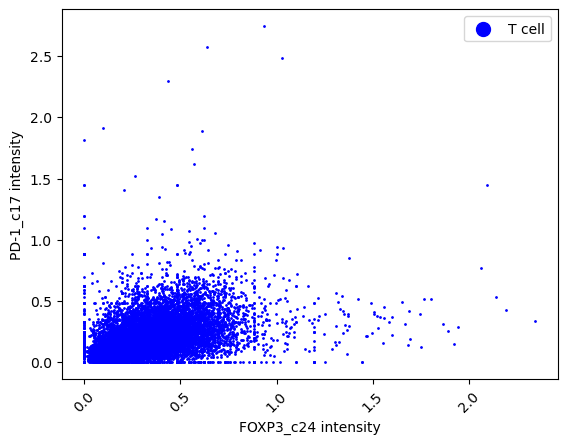

In [213]:
# Specifiy celltype, channels and dot size and max x,y window for scatterplot
data = batch2
celltypes = ['T cell']
channels = ['FOXP3_c24', 'PD-1_c17']
size = 1
# max_xy = (0.00004,0.00002)
max_xy = None

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'yellow', 'cyan', 'magenta', 'olive', 'maroon', 'navy', 'aqua', 'teal']

# Plot the figure
plot_markers_per_cell(data, celltypes, channels, size, colors, max_xy)
# 0.000007

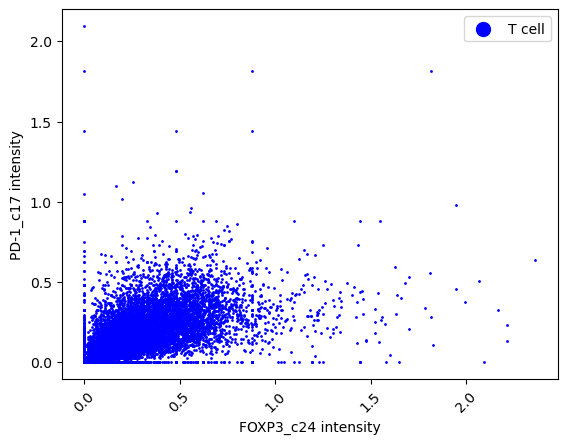

In [212]:
# Specifiy celltype, channels and dot size and max x,y window for scatterplot
data = batch1
celltypes = ['T cell']
channels = ['FOXP3_c24', 'PD-1_c17']
size = 1
# max_xy = (0.00004,0.00002)
max_xy = None

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'yellow', 'cyan', 'magenta', 'olive', 'maroon', 'navy', 'aqua', 'teal']

# Plot the figure
plot_markers_per_cell(data, celltypes, channels, size, colors, max_xy)
# 0.000007

In [201]:
tcells.columns[10:]
tcellmarker = tcells[['Cluster_levels', 'FOXP3_c24', 'PD-1_c17']]
tcellmarker

,Cluster_levels,FOXP3_c24,PD-1_c17
CellID,,,
B15-69198-1_1_5,T cell,0.332202,0.112544
B15-69198-1_1_6,T cell,0.266934,0.057440
B15-69198-1_1_11,T cell,0.233175,0.156226
B15-69198-1_1_20,T cell,0.334171,0.074399
B15-69198-1_1_37,T cell,0.339875,0.117837
...,...,...,...
B19-15832-1_1_5925,T cell,0.881374,0.000000
B19-15832-1_2_478,T cell,0.062459,0.186418
B19-15832-1_2_499,T cell,0.048592,0.034715


In [198]:
tcells = cd[cd['Cluster_levels'] == 'T cell']
tcells.

,Cluster_levels,Center_X,Center_Y,SampleID,BatchID,ROI_ID,CellNumber,Histone H3_c1,SMA_c2,pan Cytokeratin_c3,...,CD4_c32,CD31 / vWF_c33,CD14_c34,CCL21_c35,CD206 (MMR)_c36,Cleaved Caspase3_c37,Iridium_c38,Iridium2_c39,CD15_c40,HLA-ABC_c41
CellID,,,,,,,,,,,,,,,,,,,,,
B15-69198-1_1_5,T cell,265.015038,5.578947,B15-69198-1,20200318,B15-69198-1_1,5,2.414764,1.524671,0.938664,...,0.595714,1.443635,1.241789,0.194265,0.216353,0.633467,2.770861,3.315642,0.289186,0.209001
B15-69198-1_1_6,T cell,325.867816,5.787356,B15-69198-1,20200318,B15-69198-1_1,6,1.132626,1.407063,0.068911,...,0.581596,0.731770,1.052967,0.148875,0.068911,0.629921,3.112172,3.683459,0.177232,0.103265
B15-69198-1_1_11,T cell,598.254902,4.431373,B15-69198-1,20200318,B15-69198-1_1,11,1.924516,0.608757,0.175567,...,1.283796,0.766000,1.536132,0.252219,0.308795,1.167261,3.696335,4.221452,0.117377,0.194843
B15-69198-1_1_20,T cell,655.606383,7.840426,B15-69198-1,20200318,B15-69198-1_1,20,2.586863,1.339018,0.574291,...,0.619234,1.586279,1.064100,0.106183,0.116756,0.610332,2.986511,3.543336,0.190338,0.293635
B15-69198-1_1_37,T cell,184.401575,11.070866,B15-69198-1,20200318,B15-69198-1_1,37,1.927160,0.993603,0.110014,...,1.087540,0.789428,1.214259,0.172373,0.187869,0.574219,3.388595,3.933289,0.203321,0.133462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B19-15832-1_1_5925,T cell,495.000000,796.000000,B19-15832-1,20200319,B19-15832-1_1,5925,3.466711,0.000000,0.000000,...,0.881374,2.644121,0.000000,0.000000,0.881374,0.000000,3.638278,3.784706,3.402307,0.881374
B19-15832-1_2_478,T cell,638.625000,551.750000,B19-15832-1,20200319,B19-15832-1_2,478,0.186418,0.307625,0.062459,...,1.599780,1.086049,0.481212,0.186418,0.000000,0.307625,0.924885,1.194763,0.124677,0.186418
B19-15832-1_2_499,T cell,669.888889,580.576389,B19-15832-1,20200319,B19-15832-1_2,499,0.274324,0.795386,0.020832,...,0.193240,0.366725,0.159051,0.083237,0.000000,0.206855,1.143620,1.492250,0.152190,0.083237


In [187]:
cd

,Cluster_levels,Center_X,Center_Y,SampleID,BatchID,ROI_ID,CellNumber
CellID,,,,,,,
B15-69198-1_1_1,Undefined,68.349206,9.761905,B15-69198-1,20200318,B15-69198-1_1,1
B15-69198-1_1_2,Myeloid,89.095238,5.865079,B15-69198-1,20200318,B15-69198-1_1,2
B15-69198-1_1_3,Undefined,157.127273,7.363636,B15-69198-1,20200318,B15-69198-1_1,3
B15-69198-1_1_4,Undefined,173.149254,5.059701,B15-69198-1,20200318,B15-69198-1_1,4
B15-69198-1_1_5,T cell,265.015038,5.578947,B15-69198-1,20200318,B15-69198-1_1,5
...,...,...,...,...,...,...,...
B19-15832-1_2_695,Undefined,85.154930,874.042254,B19-15832-1,20200319,B19-15832-1_2,695
B19-15832-1_2_696,Undefined,173.955696,877.145570,B19-15832-1,20200319,B19-15832-1_2,696
B19-15832-1_2_697,Undefined,412.258065,878.238710,B19-15832-1,20200319,B19-15832-1_2,697


In [184]:
expr.index[0]

'B15-69198-1_1_1'

In [113]:
for col in cd.columns:
    print(col)
    print(cd[col].nunique())

CellID
99659
Cluster_levels
6
Center_X
91343
Center_Y
91090
PatientID
7
BatchID
2
SampleID
14
ROI
4
CellNumber
6895
ImageNumber
34


In [125]:
result = cd.groupby(by=['BatchID','PatientID', 'SampleID']).agg(lambda x: x.mode().iloc[0])
result

CellID Cluster_levels    Center_X  \
BatchID  PatientID SampleID                                                  
20200318 2         B15-69198-1  B15-69198-1_1_1         T cell   94.000000   
                   B17-68956-6  B17-68956-6_1_1         Tumour  906.000000   
         4         B17-36714-1  B17-36714-1_1_1        Myeloid   12.333333   
                   B18-25674-1  B18-25674-1_1_1        Myeloid   76.000000   
         11        NB17-214-1    NB17-214-1_1_1        Myeloid   83.000000   
                   Z18-1540-1    Z18-1540-1_1_1         Vessel  464.000000   
         12        NB13-417-1    NB13-417-1_1_1        Myeloid   10.000000   
                   NB17-597-1    NB17-597-1_3_1        Myeloid  577.000000   
20200319 5         B17-46201-6  B17-46201-6_1_1        Myeloid  146.000000   
                   B19-15832-1  B19-15832-1_1_1         T cell   98.000000   
         9         B16-67351-1  B16-67351-1_1_1      Undefined  298.000000   
                   B18-83191-1  B18-83191-1_1_1      Undefined  289.948718   
         14        B16-7220-1    B16-7220-1_1_1         Tumour  288.500000   
                   B17-8698-3    B17-8698-3_1_1         T cell  623.000000   

                                  Center_Y  ROI  CellNumber  ImageNumber  
BatchID  PatientID SampleID                                               
20200318 2         B15-69198-1   36.000000    1           1            1  
                   B17-68956-6  246.000000    2           1            8  
         4         B17-36714-1   20.000000    2           1            6  
                   B18-25674-1    6.000000    2           1           10  
         11        NB17-214-1    75.000000    2           1           13  
                   Z18-1540-1   200.000000    1           1           20  
         12        NB13-417-1   626.000000    1           1           16  
                   NB17-597-1   172.000000    4           1           19  
20200319 5         B17-46201-6   16.500000    1           1           26  
                   B19-15832-1  458.000000    1           1           33  
         9         B16-67351-1  132.000000    1           1           22  
                   B18-83191-1   39.578947    1           1           30  
         14        B16-7220-1    75.000000    2           1           25  
                   B17-8698-3   674.000000    1           1           28

In [126]:
# SampleID, ROI and Cellnumber is enough to distinguish specific cells
# Patient ID is weird
result = cd.groupby(by=['SampleID', 'ROI', 'CellNumber']).agg(lambda x: x.mode().iloc[0])
result

CellID Cluster_levels    Center_X  \
SampleID    ROI CellNumber                                                 
B15-69198-1 1   1             B15-69198-1_1_1      Undefined   68.349206   
                2             B15-69198-1_1_2        Myeloid   89.095238   
                3             B15-69198-1_1_3      Undefined  157.127273   
                4             B15-69198-1_1_4      Undefined  173.149254   
                5             B15-69198-1_1_5         T cell  265.015038   
...                                       ...            ...         ...   
Z18-1540-1  2   1084        Z18-1540-1_2_1084         Vessel   18.917808   
                1085        Z18-1540-1_2_1085         Vessel  199.857143   
                1086        Z18-1540-1_2_1086         Vessel  325.588235   
                1087        Z18-1540-1_2_1087         Vessel  236.100000   
                1088        Z18-1540-1_2_1088         Vessel  222.741935   

                              Center_Y  PatientID   BatchID  ImageNumber  
SampleID    ROI CellNumber                                                
B15-69198-1 1   1             9.761905          2  20200318            1  
                2             5.865079          2  20200318            1  
                3             7.363636          2  20200318            1  
                4             5.059701          2  20200318            1  
                5             5.578947          2  20200318            1  
...                                ...        ...       ...          ...  
Z18-1540-1  2   1084        793.719178         11  20200318           21  
                1085        794.107143         11  20200318           21  
                1086        792.352941         11  20200318           21  
                1087        793.150000         11  20200318           21  
                1088        795.903226         11  20200318           21  

[99659 rows x 7 columns]

In [120]:
# BatchID separated the SampleID by day
# Below is key for future reference
result = cd.groupby(by=['BatchID','SampleID']).agg(lambda x: x.mode().iloc[0])
result

CellID Cluster_levels    Center_X    Center_Y  \
BatchID  SampleID                                                              
20200318 B15-69198-1  B15-69198-1_1_1         T cell   94.000000   36.000000   
         B17-36714-1  B17-36714-1_1_1        Myeloid   12.333333   20.000000   
         B17-68956-6  B17-68956-6_1_1         Tumour  906.000000  246.000000   
         B18-25674-1  B18-25674-1_1_1        Myeloid   76.000000    6.000000   
         NB13-417-1    NB13-417-1_1_1        Myeloid   10.000000  626.000000   
         NB17-214-1    NB17-214-1_1_1        Myeloid   83.000000   75.000000   
         NB17-597-1    NB17-597-1_3_1        Myeloid  577.000000  172.000000   
         Z18-1540-1    Z18-1540-1_1_1         Vessel  464.000000  200.000000   
20200319 B16-67351-1  B16-67351-1_1_1      Undefined  298.000000  132.000000   
         B16-7220-1    B16-7220-1_1_1         Tumour  288.500000   75.000000   
         B17-46201-6  B17-46201-6_1_1        Myeloid  146.000000   16.500000   
         B17-8698-3    B17-8698-3_1_1         T cell  623.000000  674.000000   
         B18-83191-1  B18-83191-1_1_1      Undefined  289.948718   39.578947   
         B19-15832-1  B19-15832-1_1_1         T cell   98.000000  458.000000   

                      PatientID  ROI  CellNumber  ImageNumber  
BatchID  SampleID                                              
20200318 B15-69198-1          2    1           1            1  
         B17-36714-1          4    2           1            6  
         B17-68956-6          2    2           1            8  
         B18-25674-1          4    2           1           10  
         NB13-417-1          12    1           1           16  
         NB17-214-1          11    2           1           13  
         NB17-597-1          12    4           1           19  
         Z18-1540-1          11    1           1           20  
20200319 B16-67351-1          9    1           1           22  
         B16-7220-1          14    2           1           25  
         B17-46201-6          5    1           1           26  
         B17-8698-3          14    1           1           28  
         B18-83191-1          9    1           1           30  
         B19-15832-1          5    1           1           33

In [105]:
coldata['Cluster_levels'].value_counts()

Cluster_levels
Myeloid      40092
T cell       22107
Tumour       15379
Vessel       10489
Undefined     9813
Stroma        1779
Name: count, dtype: int64